# Chapter 2: Intoduction to Probability

In [2]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import random

from collections import Counter

**Exercise 1**: Toss coin 50 times, how does # heads compare to perdicted

In [3]:
experiment1 = [random.choice(['H', 'T']) for _ in range(50)]

In [4]:
res = Counter(experiment1)
res # expected 25, observed 27

Counter({'T': 25, 'H': 25})

**Exercise 2**: Toss 5 coins and count heads, repeat 50 times, compare to predicted

In [5]:
experiment2 = [[random.choice(['H', 'T']) for _ in range(5)]
               for _ in range(50)]
print(experiment2)

[['T', 'H', 'T', 'H', 'T'], ['H', 'H', 'H', 'H', 'H'], ['H', 'T', 'T', 'T', 'H'], ['H', 'T', 'H', 'H', 'H'], ['H', 'T', 'T', 'H', 'T'], ['T', 'T', 'T', 'T', 'T'], ['T', 'T', 'H', 'T', 'T'], ['H', 'T', 'T', 'T', 'H'], ['T', 'T', 'T', 'H', 'H'], ['H', 'H', 'T', 'H', 'T'], ['H', 'T', 'H', 'H', 'H'], ['H', 'T', 'H', 'H', 'T'], ['T', 'T', 'H', 'H', 'H'], ['T', 'T', 'H', 'T', 'H'], ['T', 'T', 'H', 'T', 'T'], ['H', 'T', 'H', 'T', 'T'], ['T', 'H', 'H', 'H', 'H'], ['T', 'T', 'T', 'T', 'H'], ['T', 'T', 'H', 'T', 'H'], ['H', 'H', 'H', 'H', 'T'], ['T', 'H', 'T', 'T', 'H'], ['T', 'H', 'T', 'H', 'H'], ['T', 'H', 'H', 'T', 'H'], ['H', 'H', 'T', 'H', 'T'], ['T', 'H', 'H', 'H', 'H'], ['H', 'T', 'H', 'H', 'T'], ['H', 'H', 'T', 'T', 'T'], ['T', 'H', 'H', 'T', 'T'], ['T', 'H', 'H', 'H', 'H'], ['T', 'H', 'T', 'H', 'T'], ['H', 'T', 'H', 'H', 'T'], ['H', 'H', 'T', 'H', 'T'], ['T', 'H', 'T', 'H', 'T'], ['H', 'H', 'T', 'T', 'H'], ['T', 'H', 'H', 'T', 'H'], ['T', 'H', 'T', 'H', 'T'], ['T', 'H', 'H', 'H', 'H'], 

In [6]:
heads = [sum([1 for flip in trial if flip == 'H']) for trial in experiment2]
print(heads)

[2, 5, 2, 4, 2, 0, 1, 2, 2, 3, 4, 3, 3, 2, 1, 2, 4, 1, 2, 4, 2, 3, 3, 3, 4, 3, 2, 2, 4, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 3, 1, 1, 3, 2, 3, 2, 4, 3, 3, 2]


Text(0.5, 1.0, 'Distribution of heads')

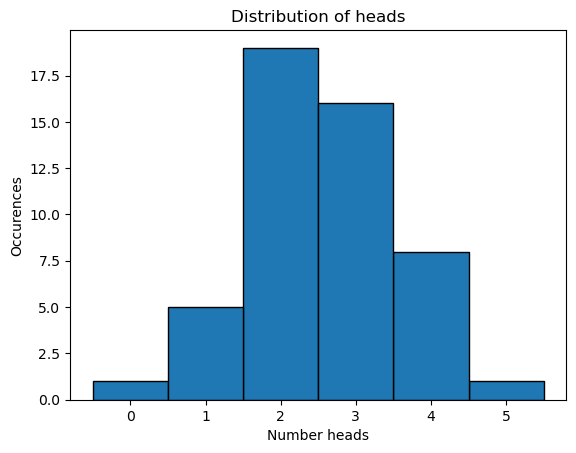

In [7]:
counts = Counter(heads)
plt.bar(
    counts.keys(),
    counts.values(),
    1, # width
    edgecolor=(0, 0, 0)
)
plt.xlabel("Number heads")
plt.ylabel("Occurences")
plt.title("Distribution of heads")


**Exercise 3**: Suppose you toss two coins, what is the probablity they will match?

In [12]:
total_outs = get_coin_outcomes(2) # 4
desired_outs = sum([1 for out in total_outs if out[0] == out[1]])
desired_outs / len(total_outs)

0.5

**Exercise 5**: Write a function that returns all possible combinations of tossing a coin n times

In [13]:
def get_coin_outcomes(n: int) -> int:
    return list(itertools.product(['H', 'T'], repeat=n))

assert len(get_coin_outcomes(6)) == 64

**Exercise 6**: write a function for factorial

In [14]:
def fac(n: int) -> int:
    if n == 0:
        return 1
    else:
        return n * fac(n-1)
     
assert fac(6) == 720

**Exercise 7**: Write a program the reads number of coin tosses and prints a table shoing the probabily of heads from h=0 to h=1

In [74]:
def get_probability_table(n: int, method: str='fac') -> pd.DataFrame:
    
    assert method in ['count', 'fac'], 'method must be "count" or "fac"'
    
    count_heads = [i for i in range(n+1)]
    
    if method=='count':
        outcomes = get_coin_outcomes(n)
        total_outcomes = len(outcomes)

        probabilities = []
        for count in count_heads:
            successes = 0
            for outcome in outcomes:
                if outcome.count('H') == count:
                    successes += 1
            probabilities.append(successes/total_outcomes)
    
    elif method=='fac':

        
        modifier = pow(2, -n)
        fac_n = fac(n)
        
        probabilities = [(fac_n/(fac(count)*fac(n-count))*modifier)
                        for count in count_heads]
            
    return pd.DataFrame(
            {f'coutn_heads (n={n})' : count_heads,
             'probability' : probabilities}
        )
                

In [77]:
get_probability_table(10, method='count')

,coutn_heads (n=10),probability
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117188
8,8,0.043945
9,9,0.009766


In [76]:
get_probability_table(10, method='fac')

,coutn_heads (n=10),probability
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117188
8,8,0.043945
9,9,0.009766


In [78]:
%timeit get_probability_table(10, method='count')
%timeit get_probability_table(10, method='fac') # way faster

1.86 ms ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
97.1 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**Exercise 8**: If you flip a coin 50 times, what it the probability of getting 25 heads?  If 100, 50 heads?

In [87]:
# 25 heads
f'{fac(50)/(fac(25)*fac(50-25))*pow(2, -50):.3f}'

'0.112'

In [89]:
# 50 heads
f'{fac(100)/(fac(50)*fac(100-50))*pow(2, -100):.3f}'

'0.080'

### Added the functions to a utils.py

In [3]:
from ..utils import utils

ImportError: attempted relative import with no known parent package

In [11]:
utils.get_probability_table(4)

,coutn_heads (n=4),probability
0,0,0.0625
1,1,0.2500
2,2,0.3750
3,3,0.2500
4,4,0.0625


In [12]:
utils.get_coin_outcomes(4)

[('H', 'H', 'H', 'H'),
 ('H', 'H', 'H', 'T'),
 ('H', 'H', 'T', 'H'),
 ('H', 'H', 'T', 'T'),
 ('H', 'T', 'H', 'H'),
 ('H', 'T', 'H', 'T'),
 ('H', 'T', 'T', 'H'),
 ('H', 'T', 'T', 'T'),
 ('T', 'H', 'H', 'H'),
 ('T', 'H', 'H', 'T'),
 ('T', 'H', 'T', 'H'),
 ('T', 'H', 'T', 'T'),
 ('T', 'T', 'H', 'H'),
 ('T', 'T', 'H', 'T'),
 ('T', 'T', 'T', 'H'),
 ('T', 'T', 'T', 'T')]

In [13]:
utils.fac(6)

720

In [14]:
utils.get_binary_probability(100,50)

0.07958923738717877